## Laptop Price Prediction

The goals of this small project is to make a prediction of laptop's price. The dataset is available on [kaggle](https://www.kaggle.com/datasets/mohidabdulrehman/laptop-price-dataset).

We first analyze the dataset and explore it. After some preprocessing step, we will use a machine learning algorithm to make the predicition of the price.

Note that `price` is a continuous value, so we will use a regression model (recall that classification is used for discrete values)

We will use principally `pandas` library to do dataset analysis, `seaborn` to visualize data and `scikit-learn` to apply standardization and machine learning model

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/laptop_price.csv', encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Note in `df` definition we use `encoding='latin-1'`. This encoding is necessary to read this dataset in Windows

### Data exploration and analysis

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 1303 rows and 13 columns


In [5]:
print(f'Features of this dataset are: {df.columns}')

Features of this dataset are: Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


In [6]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


This Dataset has 13 features:
- `laprtop_ID`: id for each laptop in the dataset
- `Company` : company/manufacturer name
- `Product` : brand and model
- `TypeName` : type (Notebook, Ultrabook, Gaming, etc.)
- `Inches` : screen size
- `ScreenResolution` : screen resolution
- `Cpu` : Central Processing Unit (CPU)
- `Ram` : laptop RAM
- `Memory` : Hard Disk / SSD Memory
- `GPU` : Graphics Processing Units (GPU)
- `OpSys` : Operating System
- `Weight` : Laptop Weight
- `Price_euros` : Price (Euro)



The target feature is `Price_euros`, while the other features are the indipendent variables. 

From `name_dataset.info()` (name_dataset is df in our case) we get some information about the datset. For example, we can check if there are missing values and verify the type of each column. <br>
Note that some of the features are in *object* type, so we will extract from them some useful information and process them into numeric type. This process is needed beacuse the most of machine learning model work with numeric type of data. 

Below, there is another way to check the existance of missing values:

In [4]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Check the existance of duplicated rows

In [5]:
df.duplicated().sum()

0

From a first sight, we can see that some useful information for making laptop's price prediction (i.e. ScreenResolution dimension) belongs to *object* type.

Before extract them, we will analyse the other features which do not contain numeric values

In [9]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
df.Product.unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [12]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

We used `unique()` to display all unique values of that specific column. <br>
We can see that in `Product` features there are a lot of unique rows. So we could think to drop this column from our dataset because there are to many distinct values to be influent to price

In [6]:
df = df.drop(columns='Product')

### Data Preprocessing

We want extract numeric values from some *object* type features. 

We will get :
- `ScreenWidth` and `ScreenHeigth` from `ScreenResolution`
- `Ram` numeric value from `Ram`
- `CpuType` and `CpuFrequency` from`Cpu`
- `GpuBrand` from `Gpu`
- `MemoryAmount` and `MemoryType` from `Memory`
- `Weight` numeric value from `Weight`

`ScreenResolution` contains strings of the form *num_1 x num_2* where *num_1* and *num_2* are respectively the width and the heigth

In [7]:
df['ScreenWidth'] = df['ScreenResolution'].apply(lambda row : row.split()[-1].split('x')[0]).astype('int')
df['ScreenHeigth'] = df['ScreenResolution'].apply(lambda row : row.split()[-1].split('x')[1]).astype('int')

`Ram` contains strings of the form *num*GB. We want to extract only the number

Similar for `Weight`, in which data are strings of the form *num*kg

In [8]:
# Check Ram has only GB
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [9]:
df['Ram'] = df['Ram'].str[:-2].astype('int')

In [10]:
df['Weight'] = df['Weight'].str[:-2].astype('float')

From `Cpu` we want to extract main types. To do this extraction, we create a simple function `intel_split` and apply it to `Cpu` column 

Then we extract the Cpu frenquency noting that is is always written at the end of `Cpu` objects, in the format *num*GHz

In [11]:
def intel_split(text):
    text = text.split(' ')
    if(text[2] == 'i5'):
        text = 'Intel Core i5'
    elif (text[2] == 'i3'):
        text = 'Intel Core i3'
    elif (text[2] == 'i7'):
        text = 'Intel Core i7'
    elif (text[0] == 'AMD'):
        text = 'AMD' 
    elif (text[0] != 'Intel'):
        text = 'Other Cpu Type'
    else:
        text = 'Intel Other'
    return text

In [12]:
df['CpuType'] = df['Cpu'].apply(intel_split)

In [13]:
df['CpuFrequency'] = df['Cpu'].apply(lambda row : row.split(' ')[-1][:-3]).astype('float')

We also extract the Gpu Brand from `Gpu` column

In [14]:
df['GpuBrand'] = df['Gpu'].apply(lambda row: row.split(' ')[0])

In `Memory` data are in the form "*num*GB *type*"

In order to extract the amount of memory, we create two functions:
- `split_memory` : split an input string and return a list of the form [*num*GB, *type*]
- `mega_byte` : conversion of data in mega byte 

In [15]:
def split_memory(text):
    x = float(text[:-2])
    y = text[-2:]
    text_list = [x,y]
    return text_list

In [16]:
def mega_byte(text):
    if 'GB' in text[1]:
        return float(text[0])*1000
    elif 'TB' in text[1]:
        return float(text[0])*1000000

In [17]:
df['MemoryAmount'] = df['Memory'].apply(lambda row : row.split(' ')[0]).apply(split_memory).apply(mega_byte).astype('float')

In [18]:
df['MemoryType'] = df['Memory'].apply(lambda row : row.split(' ')[1])

In [19]:
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeigth,CpuType,CpuFrequency,GpuBrand,MemoryAmount,MemoryType
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,Intel Core i5,2.3,Intel,128000.0,SSD
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,Intel Core i5,1.8,Intel,128000.0,Flash
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,Intel Core i5,2.5,Intel,256000.0,SSD
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,Intel Core i7,2.7,AMD,512000.0,SSD
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,Intel Core i5,3.1,Intel,256000.0,SSD


To make cleaner the dataset, we drop the modified columns

In [20]:
df = df.drop(columns=['ScreenResolution', 'Cpu', 'Memory', 'Gpu'])

### Data Visualization

Before applying a machine learning algorithm, we want to visualize features and their relationships with price using `seaborn` library. To represent them, we will use the boxplot

In [21]:
# boxplot function
def box_plot_price(feature, color, title):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = df, x = 'Price_euros', y = feature, color = color)
    plt.title(f"Laptop price by {title}")

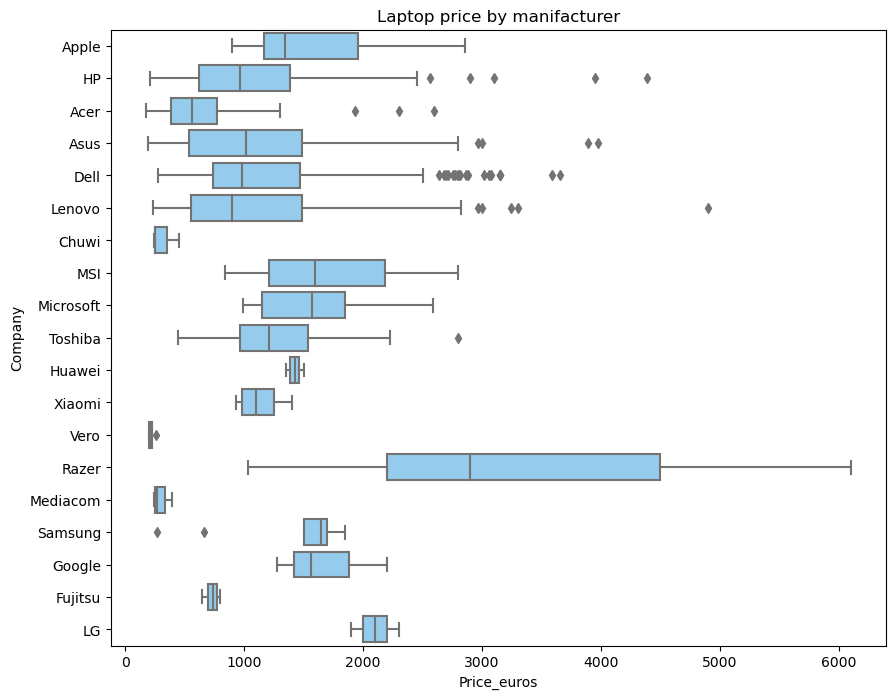

In [30]:
box_plot_price('Company', "lightskyblue", 'manifacturer')

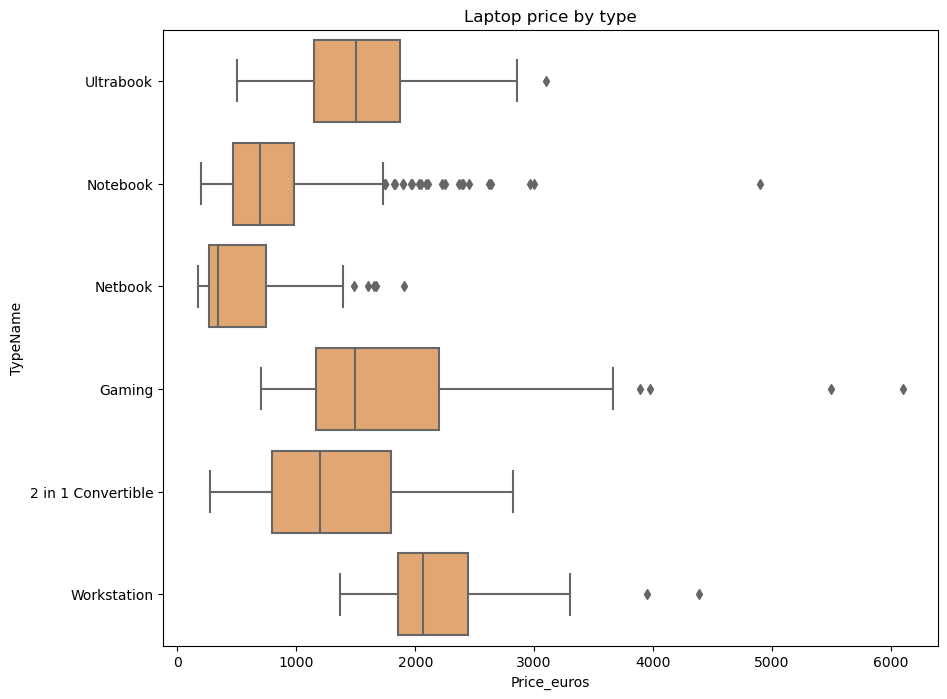

In [31]:
box_plot_price('TypeName', "sandybrown", 'type')

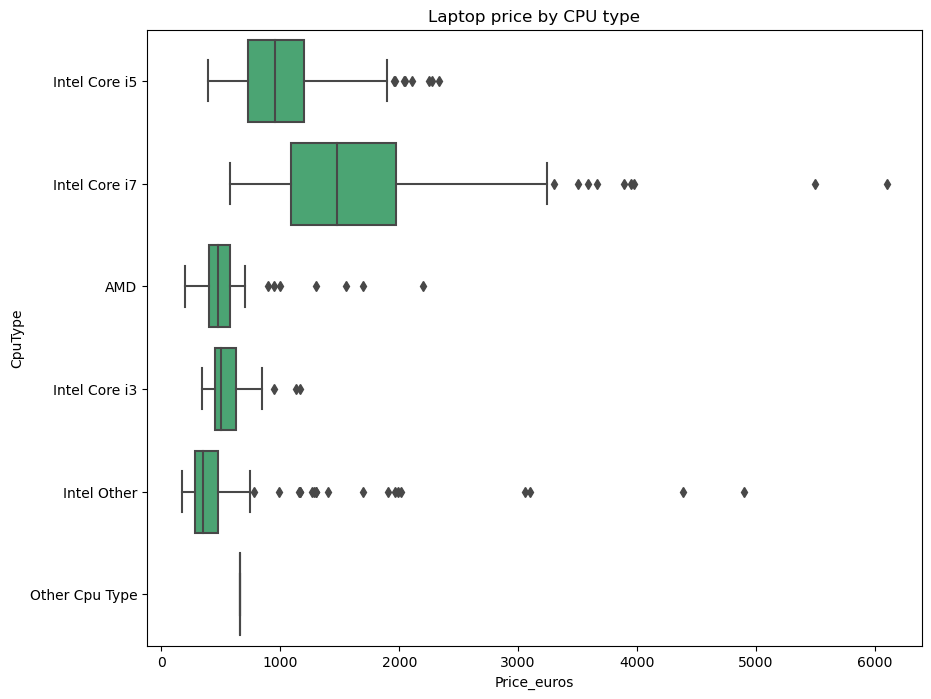

In [32]:
box_plot_price('CpuType', "mediumseagreen", 'CPU type')

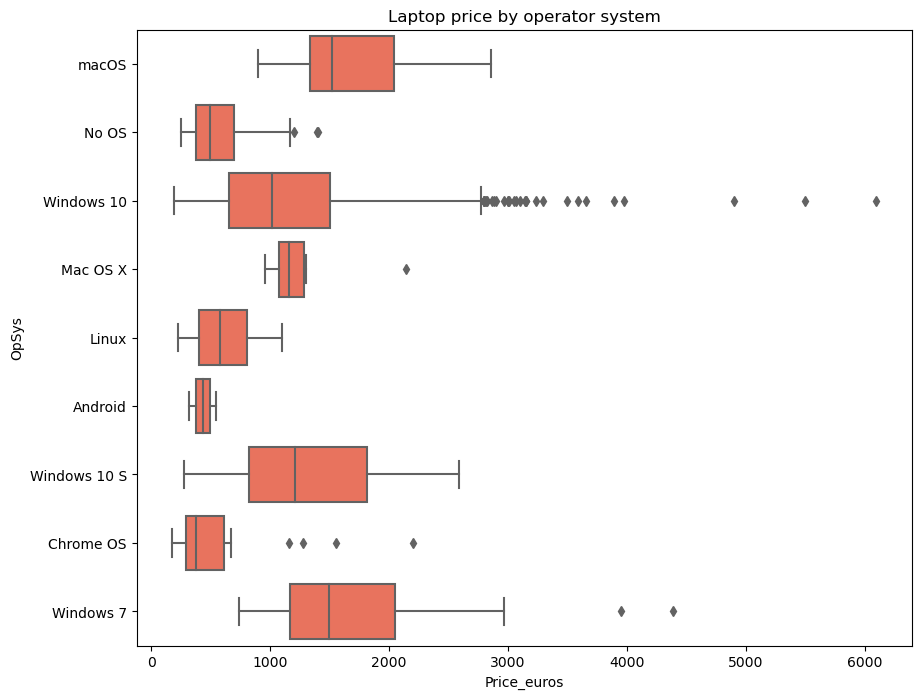

In [34]:
box_plot_price('OpSys', "tomato", 'operator system')

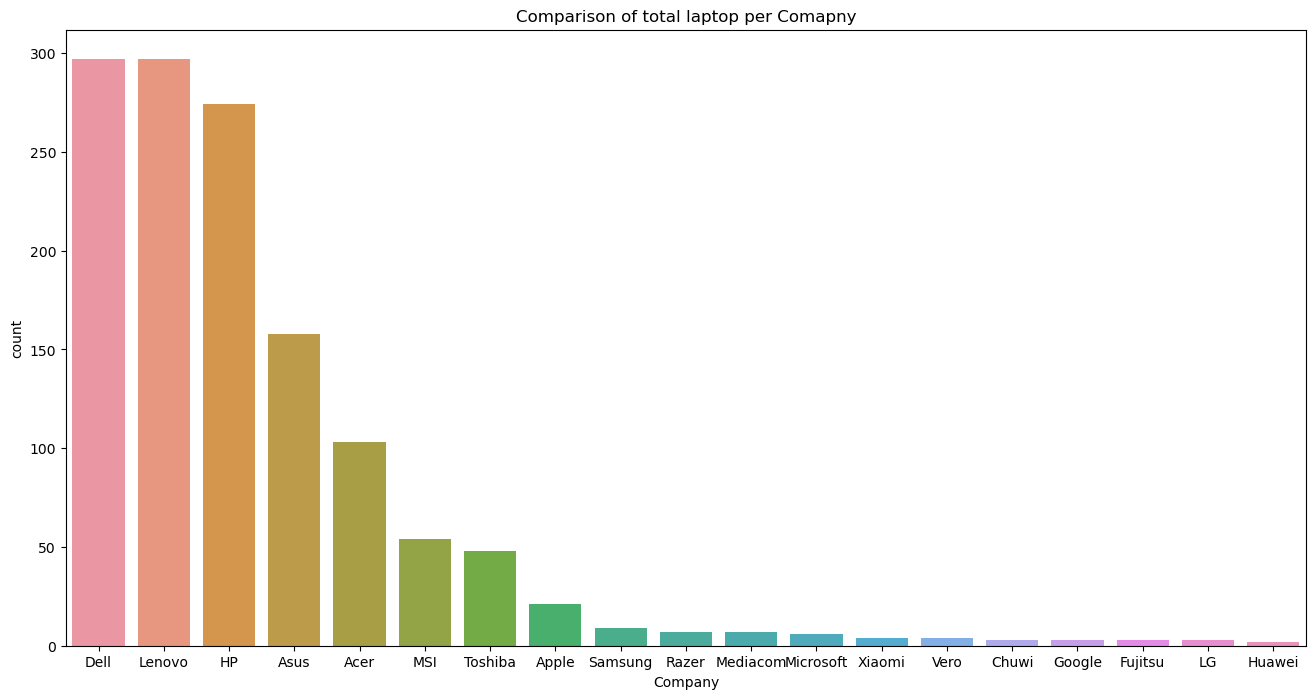

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = 'Company', order = df['Company'].value_counts().index)
plt.title(f"Comparison of total laptop per Comapny")
plt.show()

### Encoding
To apply machine learning algorithms, we have to convert string data type into numerica ones. To do this, we will use the `get_dummies` encoding 

In [28]:
df = df.join(pd.get_dummies(df['Company'], dtype='int'))

In [29]:
df = df.join(pd.get_dummies(df['OpSys'], dtype='int'))

In [30]:
df = df.join(pd.get_dummies(df['CpuType'], dtype='int'))

In [31]:
gpuBrandDf = pd.get_dummies(df['GpuBrand'], dtype='int')
gpuBrandDf.columns = [col + '_Gpu' for col in gpuBrandDf.columns]
df = df.join(gpuBrandDf)

In [32]:
df = df.join(pd.get_dummies(df['TypeName'], dtype='int'))

We drop all *object* type columns

In [33]:
df = df.drop(columns=['Company', 'OpSys', 'CpuType', 'GpuBrand', 'TypeName'])

To see linear relation between features, we use correlation.

Recall that if two variables are correlated, then it means that they are dependent from each other. So, in particularly, the correlation coefficient is a value between -1 and 1 that tells us how much variables are correlated:
- if correlation is closed to 1, the variables are positively dependent
- if correlation is closed to - 1, the variables are negatively dependent
- if correlation is closed to 0, the variables independent

In [34]:
df.corr(numeric_only=True)

,laptop_ID,Inches,Ram,Weight,Price_euros,ScreenWidth,ScreenHeigth,CpuFrequency,MemoryAmount,Acer,...,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.042878,-0.053912,0.102716,-0.000809,-0.057721,...,-0.089050,0.039920,0.094479,-0.037596,0.066227,0.032384,0.058880,-0.049769,-0.040689,0.001167
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,-0.071245,-0.095404,0.307870,0.269511,0.009435,...,0.207023,-0.052816,-0.592264,0.486561,-0.314691,0.402666,-0.314030,0.246907,-0.417950,0.098893
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,0.433121,0.424437,0.368000,0.018271,-0.138432,...,-0.093119,-0.023894,-0.319551,0.415464,0.017560,0.481728,-0.102976,-0.416486,0.087470,0.062353
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,-0.032880,-0.053846,0.320434,0.179962,0.056444,...,0.106519,-0.037026,-0.596378,0.565232,-0.236693,0.591756,-0.154059,0.034893,-0.439952,0.097031
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,0.556529,0.552809,0.430293,-0.122365,-0.208349,...,-0.199415,-0.018431,-0.184205,0.348797,0.072675,0.375789,-0.097572,-0.549248,0.255658,0.249752
ScreenWidth,-0.042878,-0.071245,0.433121,-0.032880,0.556529,1.000000,0.994219,0.183548,-0.073893,-0.148089,...,-0.099868,0.028317,-0.105671,0.186887,0.151038,0.133892,-0.124502,-0.340982,0.227349,0.085135
ScreenHeigth,-0.053912,-0.095404,0.424437,-0.053846,0.552809,0.994219,1.000000,0.169668,-0.080979,-0.150171,...,-0.100644,0.051564,-0.091678,0.170993,0.148807,0.123317,-0.124373,-0.351597,0.256503,0.080595
CpuFrequency,0.102716,0.307870,0.368000,0.320434,0.430293,0.183548,0.169668,1.000000,0.066295,-0.104940,...,0.033050,-0.016359,-0.363658,0.368158,-0.107574,0.361680,-0.173859,-0.187179,-0.009583,0.133990
MemoryAmount,-0.000809,0.269511,0.018271,0.179962,-0.122365,-0.073893,-0.080979,0.066295,1.000000,0.028170,...,0.158836,-0.031957,-0.120888,0.013372,-0.062380,-0.093098,-0.124831,0.232881,-0.120462,-0.023491
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,-0.148089,-0.150171,-0.104940,0.028170,1.000000,...,-0.034859,-0.008119,0.005305,0.020848,-0.015336,-0.064096,0.062698,0.117594,-0.091450,-0.044202


Note how many features we have now (53 columns). <br>
But in our work, we are interested in `Price_euros` prediction. So we decide to focus our attention more on features that are most correlated to it. 

We select 20 features by using their correlation coefficient with `Price_euros` and then create a new limited dataframe

In [36]:
selected_features = df.corr(numeric_only=True).Price_euros.apply(abs).sort_values()[-21:]

In [37]:
limited_df = df[selected_features.index].copy()

In [38]:
limited_df

,No OS,MSI,AMD,Intel_Gpu,AMD_Gpu,Acer,Weight,Razer,Workstation,Ultrabook,...,Intel Other,Nvidia_Gpu,Gaming,CpuFrequency,Notebook,ScreenHeigth,ScreenWidth,Intel Core i7,Ram,Price_euros
0,0,0,0,1,0,0,1.37,0,0,1,...,0,0,0,2.3,0,1600,2560,0,8,1339.69
1,0,0,0,1,0,0,1.34,0,0,1,...,0,0,0,1.8,0,900,1440,0,8,898.94
2,1,0,0,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1080,1920,0,8,575.00
3,0,0,0,0,1,0,1.83,0,0,1,...,0,0,0,2.7,0,1800,2880,1,16,2537.45
4,0,0,0,1,0,0,1.37,0,0,1,...,0,0,0,3.1,0,1600,2560,0,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,1,0,0,1.80,0,0,0,...,0,0,0,2.5,0,1080,1920,1,4,638.00
1299,0,0,0,1,0,0,1.30,0,0,0,...,0,0,0,2.5,0,1800,3200,1,16,1499.00
1300,0,0,0,1,0,0,1.50,0,0,0,...,1,0,0,1.6,1,768,1366,0,2,229.00
1301,0,0,0,0,1,0,2.19,0,0,0,...,0,0,0,2.5,1,768,1366,1,6,764.00


We could represent the correlation between features using *seaborn.heatmap* plot

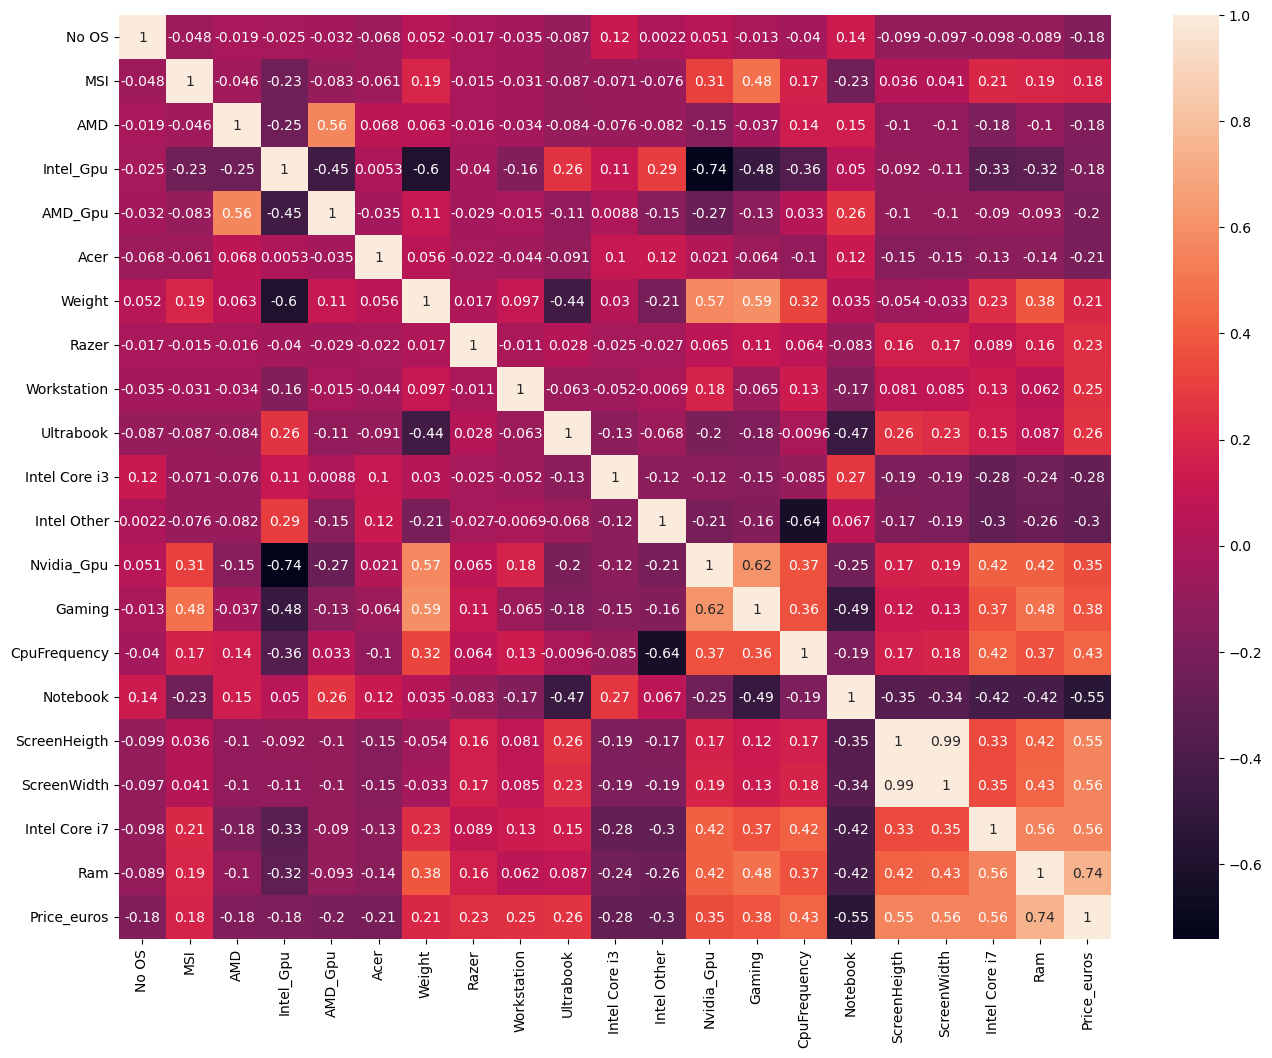

In [39]:
figure = plt.figure(figsize=(16,12))
sns.heatmap(limited_df.corr(), annot=True)
plt.show()

### Regression Model
We want to apply a regressor model to predict the laptop's price. <br>
First, we divide the dtaset into the dependent features (X) and the indipendent ones (y). Then we split our dataset into train and test sub-dataset, taking 15% of data to testing.

Finally, we scale our train and test dataset using `StandardScaler()`.

After this preprocessing steps, we use `RandomForestRegressor` to define the regression model

In [40]:
columns = limited_df.columns
X = limited_df[columns[:-1]]
y = limited_df[columns[-1]]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
forest_model = RandomForestRegressor()

forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [44]:
train_score = forest_model.score(X_train_scaled, y_train)
test_score = forest_model.score(X_test_scaled, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9637558274679633
Test Score: 0.780095143428205


The train model accuracy is of **96.37%**, while the test model accuracy is of **78.00%**

In [46]:
y_pred = forest_model.predict(X_test_scaled)

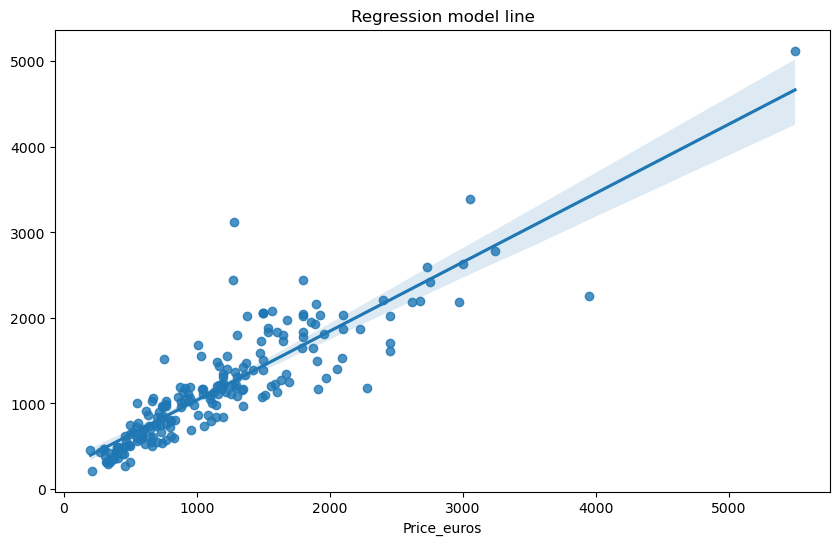

In [49]:
plt.figure(figsize=(10,6))
sns.regplot(x =y_test, y =y_pred)
plt.title(f"Regression model line")
plt.show()

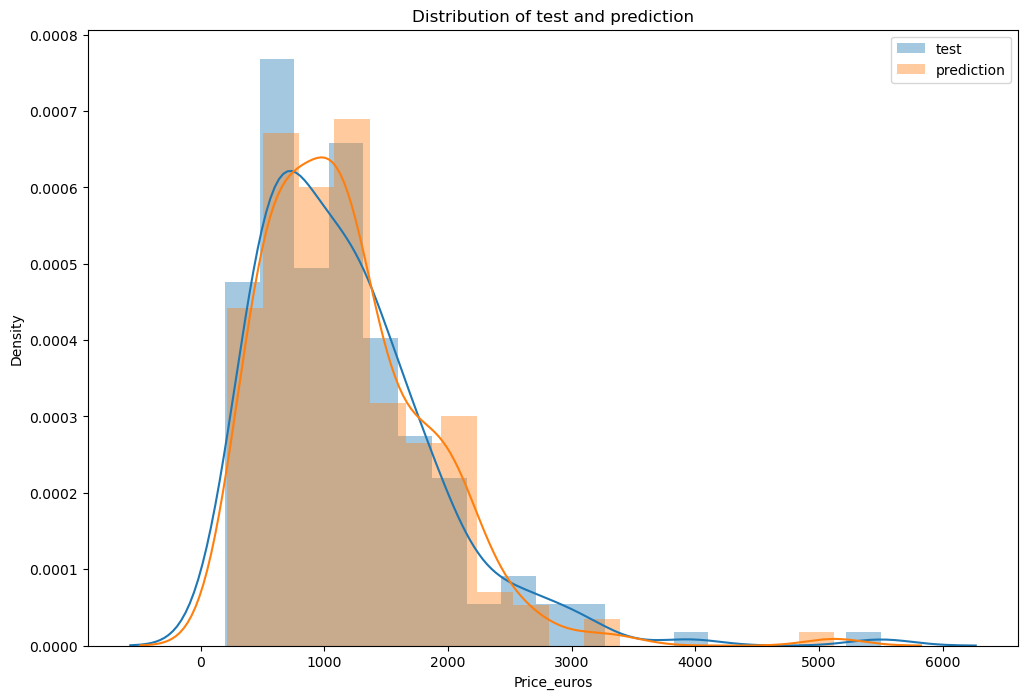

In [51]:
plt.figure(figsize=(12,8))
sns.distplot(y_test, label='test')
sns.distplot(y_pred, label = 'prediction')
plt.title(f"Distribution of test and prediction")
plt.legend()
plt.show()